In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.utils.data import get_pkg_data_filename
from scipy.ndimage.filters import gaussian_filter

from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp


In [2]:
#     **************************************  HST-SINFONI  **************************************

In [3]:
hdu0 = fits.open('/Users/orion/phd_research/3C297/imaging_data/hstf606w_cropped.fits')
data0 = hdu0[0].data
hdu0.info()
header0 = hdu0[0].header

Filename: /Users/orion/phd_research/3C297/imaging_data/hstf606w_cropped.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (680, 450)   float32   


In [4]:
wcs = WCS(header0)   
wcs.to_header()                   # already has only 2 axes

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =           312.314741 / Pixel coordinate of reference point            
CRPIX2  =          -380.976096 / Pixel coordinate of reference point            
PC1_1   =       5.13885241E-06 / Coordinate transformation matrix element       
PC1_2   =       3.35867085E-06 / Coordinate transformation matrix element       
PC2_1   =       3.35867084E-06 / Coordinate transformation matrix element       
PC2_2   =      -5.13885244E-06 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [5]:
hdu1 = fits.open('/Users/orion/phd_research/3C297/imaging_data/hstf140w_cropped.fits')
data1 = hdu1[0].data
hdu1.info()
header1 = hdu1[0].header

Filename: /Users/orion/phd_research/3C297/imaging_data/hstf140w_cropped.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (680, 450)   float32   


In [6]:
wcs = WCS(header1)   
wcs.to_header()       # already has only 2 axes

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                340.5 / Pixel coordinate of reference point            
CRPIX2  =                224.0 / Pixel coordinate of reference point            
PC1_1   =       2.98253786E-05 / Coordinate transformation matrix element       
PC1_2   =       1.94838303E-05 / Coordinate transformation matrix element       
PC2_1   =       1.94853457E-05 / Coordinate transformation matrix element       
PC2_2   =      -2.98263266E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [7]:
hdu = fits.open('/Users/orion/phd_research/3C297/imaging_data/sinfoni_Halpha_int.fits')
data = hdu[0].data
hdu.info()
header = hdu[0].header

Filename: /Users/orion/phd_research/3C297/imaging_data/sinfoni_Halpha_int.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     779   (66, 68)   float32   


In [8]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdu)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


ValueError: Input WCS is not 2-dimensional

In [9]:
wcs = WCS(header)
wcs

wcs_Ha = WCS(header,naxis=2)           #use only first two axes 

In [10]:
new_Ha_header = wcs_Ha.to_header()
new_Ha_header

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 33.5 / Pixel coordinate of reference point            
CRPIX2  =                 34.5 / Pixel coordinate of reference point            
PC1_1   = -2.4552318254592E-05 / Coordinate transformation matrix element       
PC1_2   =  2.4552319327808E-05 / Coordinate transformation matrix element       
PC2_1   =  2.4552319327808E-05 / Coordinate transformation matrix element       
PC2_2   =  2.4552318254592E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [11]:
Ha_newhdu = fits.PrimaryHDU(data=data,header=new_Ha_header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0.5, 1.0, 'SINFONI Ha')

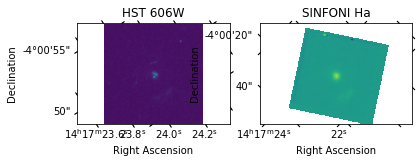

In [12]:
Ha_reg_data, Ha_reg_footprint = reproject_interp(Ha_newhdu, header0)

ax1 = plt.subplot(1,2,1, projection=WCS(header0))
ax1.imshow(data0, origin='lower')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('HST 606W')

ax2 = plt.subplot(1,2,2, projection=wcs_Ha)
ax2.imshow(Ha_reg_data, origin='lower')
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.set_title('SINFONI Ha')

In [14]:
Ha_newhdu.writeto("Ha_newwcs.fits", overwrite=True)

In [13]:
hdu_new = fits.open('/Users/orion/phd_research/3C297/imaging_data/Ha_newwcs.fits')
data_new = hdu_new[0].data
header_new = hdu_new[0].header

wcs_new = WCS(header_new)
wcs_new

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 214.35042083333  -4.0135361111111  
CRPIX : 33.5  34.5  
PC1_1 PC1_2  : -2.4552318254592e-05  2.4552319327808e-05  
PC2_1 PC2_2  : 2.4552319327808e-05  2.4552318254592e-05  
CDELT : 1.0  1.0  
NAXIS : 66  68

In [14]:
#  Reprojecting grid

list_hdus = ['hstf606W_cropped.fits','Ha_newwcs.fits']

wcs_out, shape_out = find_optimal_celestial_wcs(list_hdus)
wcs_out.to_header()

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      585.27376106713 / Pixel coordinate of reference point            
CRPIX2  =      628.44427730538 / Pixel coordinate of reference point            
CDELT1  = -6.1390938992028E-06 / [deg] Coordinate increment at reference point  
CDELT2  =  6.1390938992028E-06 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =       214.3493234147 / [deg] Coordinate value at reference point      
CRVAL2  =     -4.0120710062891 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =     -4.01207100628

In [15]:
shape_out

(749, 815)

In [15]:
# interpolating both, so they are on same North-up grid

registered_Ha, registered_Ha_footprint = reproject_interp(hdu_new, wcs_out, shape_out)
registered_606, registered_606_footprint = reproject_interp(hdu0, wcs_out, shape_out)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [17]:
registered_Ha.shape[1], registered_Ha.shape[0]

(815, 749)

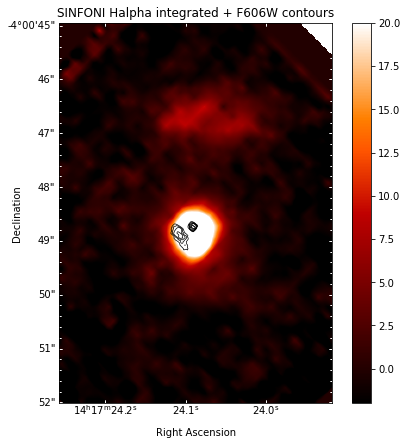

In [20]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection=wcs_out)

im = ax.imshow(registered_Ha, vmin=-2.0, vmax=20, origin='lower', cmap='gist_heat')

ax.contour(registered_606, transform=ax.get_transform(wcs_out),levels=[0.14,0.18,0.21,0.25,0.31,0.45,0.5],
                                                                colors='black', alpha=1.0, linewidths=0.7)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right Ascension',minpad=1.6)
lat.set_axislabel('Declination',minpad=-1.0)

ax.set_xlim(300,530)
ax.set_ylim(240,560)
ax.tick_params(axis='both',direction='in',color='white',labelcolor='black') 
lon.set_ticks(number=5)
lat.set_ticks(number=7)
lat.display_minor_ticks(True)
plt.title('SINFONI Halpha integrated + F606W contours')
fig.colorbar(im, ax=ax)
plt.savefig('Halpha+f606w.png', facecolor='w', dpi=1000)

In [21]:
#     *************************   HST F140W + F606W contours   *************************


In [22]:
registered_140, registered_140_footprint = reproject_interp(hdu1, wcs_out, shape_out)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


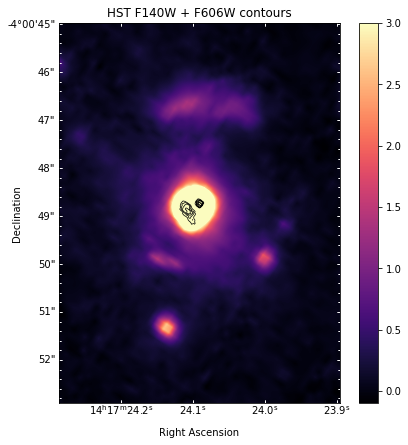

In [23]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection=wcs_out)

im = ax.imshow(registered_140, vmin=-0.1, vmax=3, origin='lower', cmap='magma')

ax.contour(registered_606, transform=ax.get_transform(wcs_out),levels=[0.14,0.18,0.21,0.25,0.31,0.45,0.5],
                                                                colors='black', alpha=1.0, linewidths=0.7)

lon = ax.coords[0] 
lat = ax.coords[1] 
lon.set_axislabel('Right Ascension',minpad=1.6) 
lat.set_axislabel('Declination',minpad=-1.0)

ax.set_xlim(280,registered_140.shape[1] - 270)
ax.set_ylim(200,registered_140.shape[0] - 190)
ax.tick_params(axis='both',direction='in',color='white',labelcolor='black') 
lon.set_ticks(number=5)
lat.set_ticks(number=7)
lat.display_minor_ticks(True)
fig.colorbar(im, ax=ax) 
plt.title('HST F140W + F606W contours') 
plt.savefig('f140w+f606w.png', facecolor='w', dpi=1000)

In [24]:
#     **************************************  RADIO  **************************************

In [16]:
hdu3 = fits.open('/Users/orion/phd_research/3C297/imaging_data/8GHz_Hilbert.fits')
data3 = hdu3[0].data
hdu3.info()
header3 = hdu3[0].header
reduction_1 = data3[0]
vla_img = reduction_1[0]

Filename: /Users/orion/phd_research/3C297/imaging_data/8GHz_Hilbert.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     390   (512, 512, 1, 1)   float32   
  1  AIPS CC       1 BinTableHDU     19   15000R x 3C   [1E, 1E, 1E]   
  2  AIPS CG       1 BinTableHDU     23   1R x 4C   [1D, 1E, 1E, 1E]   


In [17]:
#  use wcs_out (reprojected wcs) and the registered_606 image. No need to modify radio image

In [21]:
registered_606, registered_606_footprint = reproject_interp(hdu0, wcs_out, shape_out)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


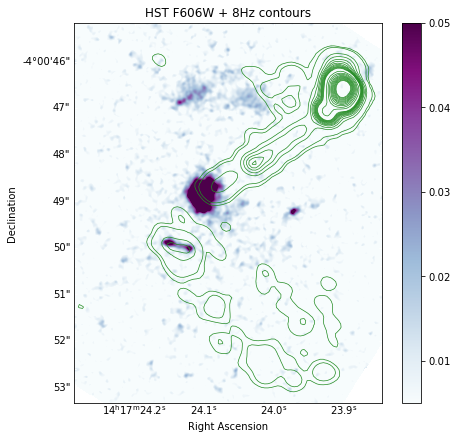

In [22]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection=wcs_out)

registered_606 = gaussian_filter(registered_606, 1.0)
im = ax.imshow(registered_606, vmin=0.005, vmax=0.05, origin='lower', cmap='BuPu') 

ax.contour(vla_img, transform=ax.get_transform(WCS(header3,naxis=2)),levels=[5e-05,0.00012,0.00086,0.0016,0.0025,
                  0.0033,0.0041,0.005,0.0057,0.0065,0.0073,0.0082,0.009,0.017,0.025,0.033,0.042,0.050,0.058,0.066,
                  0.075,0.083,0.092,0.1], colors='forestgreen', alpha=1.0, linewidths=0.7)

lon = ax.coords[0] 
lat = ax.coords[1] 
ax.set_xlabel('Right Ascension') 
ax.set_ylabel('Declination')

ax.tick_params(axis='both',direction='in',color='white',labelcolor='black') 
lon.set_ticks(number=7)
lat.set_ticks(number=10)
lat.display_minor_ticks(True)

ax.set_xlim(280,data0.shape[1] - 100)
ax.set_ylim(180,550)
fig.colorbar(im, ax=ax) 
plt.title('HST F606W + 8Hz contours') 
plt.savefig('f606w+8GHz_2.png', facecolor='w', dpi=1000)

In [31]:
registered_606, registered_606_footprint = reproject_interp(hdu0, wcs_out, shape_out)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


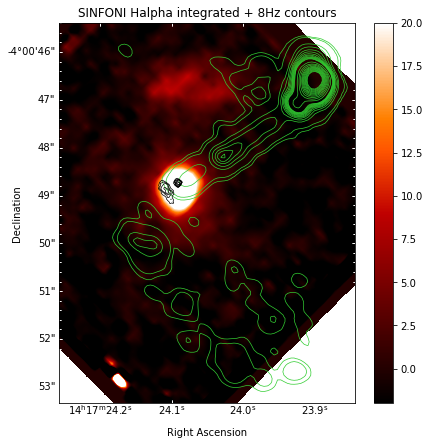

In [32]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection=wcs_out)

im = ax.imshow(registered_Ha, vmin=-2.0, vmax=20, origin='lower', cmap='gist_heat')

ax.contour(vla_img, transform=ax.get_transform(WCS(header3,naxis=2)),levels=[5e-05,0.00012,0.00086,0.0016,0.0025,
                  0.0033,0.0041,0.005,0.0057,0.0065,0.0073,0.0082,0.009,0.017,0.025,0.033,0.042,0.050,0.058,0.066,
                  0.075,0.083,0.092,0.1], colors='limegreen', alpha=1.0, linewidths=0.7)

ax.contour(registered_606, transform=ax.get_transform(wcs_out), levels=[0.14,0.18,0.21,0.25,0.31,0.45,0.5],
                                                                colors='black', alpha=1.0, linewidths=0.7)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right Ascension',minpad=1.6)
lat.set_axislabel('Declination',minpad=-1.0)

ax.set_xlim(300,580)
ax.set_ylim(180,540)
ax.tick_params(axis='both',direction='in',color='white',labelcolor='black') 
lon.set_ticks(number=5)
lat.set_ticks(number=7)
lat.display_minor_ticks(True)
plt.title('SINFONI Halpha integrated + 8Hz contours')
fig.colorbar(im, ax=ax)
plt.savefig('Halpha+8GHz.png', facecolor='w', dpi=1000)